In [1]:
import xarray as xr
import numpy as np
import glob
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.ticker as mticker
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from xarray import DataArray
import pandas as pd
# from PyEMD import EEMD
import pylab as plt

In [2]:
data       = xr.open_dataset("/work/uo1075/u241321/data/u241321/data_cdo/temperature_1969-2019_assi_dt_5000.nc",decode_times=False)
data1      = xr.open_dataset("/work/uo1075/u241321/data/u241321/data_cdo/temperature_ly_1969-2019_hindcast_dt_5000.nc",decode_times=False) 

sst_o = data ['__xarray_dataarray_variable__']
sst_h = data1['__xarray_dataarray_variable__']
var1 = np.mean(np.mean(data['__xarray_dataarray_variable__'], axis=1)[:,0:15,:,:],1)
var2= np.mean(np.mean(sst_h, axis=1)[:,:,10:15,:,:],2)

In [3]:
da_sst = var1.stack(spatial=('lat','lon'))
da_sss = var2.stack(spatial=('lat','lon'))
lat = data1['lat']
lon = data1['lon']

auto_1 = np.zeros((lat.size*lon.size))


for m in range(0,lat.size*lon.size,1):
    auto_1[m] = np.corrcoef(da_sst[0:49,m], da_sst[1:50,m])[0,1]
    

In [4]:
auto = auto_1.reshape((lat.size, lon.size))


correlation = xr.Dataset(data_vars={'lat': (["lat"], lat.data),
                              'lon':  (["lon"], lon.data),
                              'auto': (["lat", "lon"], auto),})
corr1 = correlation["auto"]

In [16]:
#  Effective degree of freedom based on Bretherton et al. (1999)  
nn = 50*(1-corr1**2)/(1+corr1**2)
nn.shape

(90, 150)

Text(0.5, 1.0, ' ')

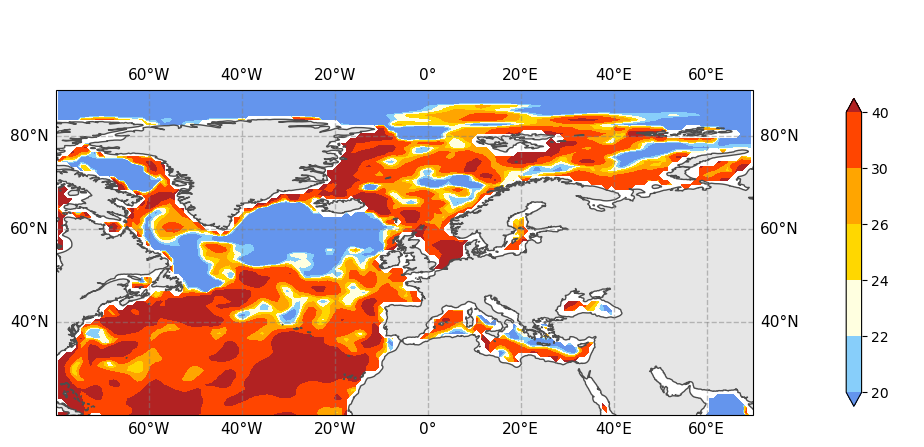

In [19]:
cc = nn  # Effective degree of freedom
fig = plt.figure(figsize=(12,5));
ax = plt.axes(projection=ccrs.PlateCarree())
p = cc.plot.contourf(ax=ax, x='lon', y='lat',levels = [20, 22, 24, 26, 30, 40], 
                              colors= ['cornflowerblue', 'lightskyblue', 'lightyellow','gold', 'orange',
                                       'orangered','firebrick', 'darkred'],
                              extend = 'both', add_colorbar=False, add_labels=False)


#ax.coastlines()
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'coastline', '50m',
                                              edgecolor='0.3',
                                              facecolor='0.9'))
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlines = True
gl.ylines = True
ax.set_extent([-80,70,20,90])
gl.xlocator = mticker.FixedLocator(np.arange(-80,90,20))
gl.ylocator = mticker.FixedLocator(np.arange(20,90,20)) #([30,60],180)


gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 11, 'color': 'k','rotation':0}
gl.ylabel_style = {'size':11,'rotation':0}
#plt.title('hello', y=1.08)


cbar = plt.colorbar(p, orientation='vertical', shrink=0.8, pad = 0.1)
cbar.set_label(' ', size= 15)
ax.set_title(' ',size = '15', pad = 30)

Text(0.5, 1.0, ' ')

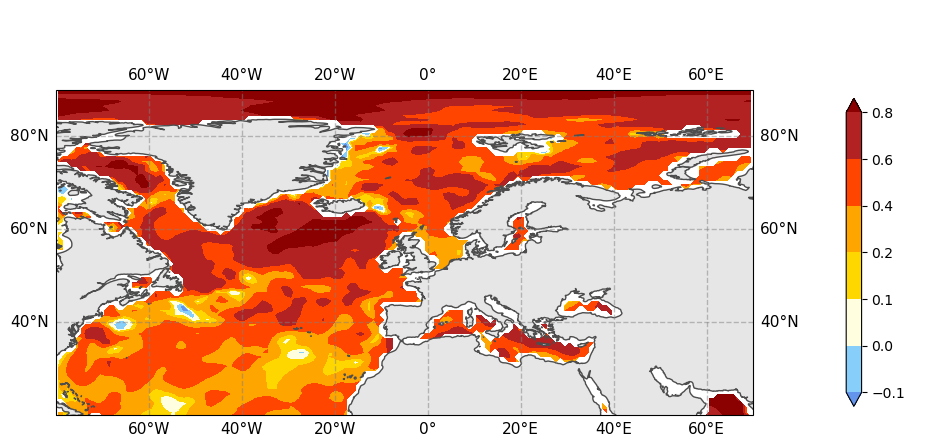

In [5]:
cc = corr1  # auto corr lag 1
fig = plt.figure(figsize=(12,5));
ax = plt.axes(projection=ccrs.PlateCarree())
p = cc.plot.contourf(ax=ax, x='lon', y='lat',levels = [-0.1, 0, 0.1, 0.2, 0.4, 0.6, 0.8], 
                              colors= ['cornflowerblue', 'lightskyblue', 'lightyellow','gold', 'orange',
                                       'orangered','firebrick', 'darkred'],
                              extend = 'both', add_colorbar=False, add_labels=False)


#ax.coastlines()
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'coastline', '50m',
                                              edgecolor='0.3',
                                              facecolor='0.9'))
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlines = True
gl.ylines = True
ax.set_extent([-80,70,20,90])
gl.xlocator = mticker.FixedLocator(np.arange(-80,90,20))
gl.ylocator = mticker.FixedLocator(np.arange(20,90,20)) #([30,60],180)


gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 11, 'color': 'k','rotation':0}
gl.ylabel_style = {'size':11,'rotation':0}
#plt.title('hello', y=1.08)


cbar = plt.colorbar(p, orientation='vertical', shrink=0.8, pad = 0.1)
cbar.set_label(' ', size= 15)
ax.set_title(' ',size = '15', pad = 30)

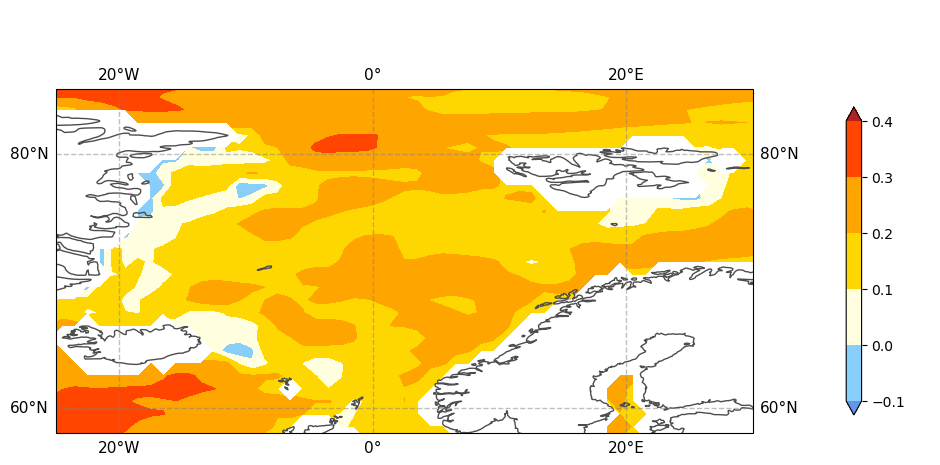

In [7]:
import math
cc = corr1/math.e
fig = plt.figure(figsize=(12,5));
ax = plt.axes(projection=ccrs.PlateCarree())
p = cc.plot.contourf(ax=ax, x='lon', y='lat',levels = [-0.1, 0, 0.1, 0.2, 0.3, 0.4], 
                              colors= ['cornflowerblue', 'lightskyblue', 'lightyellow','gold', 'orange',
                                       'orangered','firebrick', 'darkred'],
                              extend = 'both', add_colorbar=False, add_labels=False)


#ax.coastlines()
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'coastline', '50m',
                                              edgecolor='0.3',
                                              facecolor='none'))
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlines = True
gl.ylines = True
ax.set_extent([-25,30,58,85])
gl.xlocator = mticker.FixedLocator(np.arange(-80,90,20))
gl.ylocator = mticker.FixedLocator(np.arange(20,90,20)) #([30,60],180)


gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 11, 'color': 'k','rotation':0}
gl.ylabel_style = {'size':11,'rotation':0}
#plt.title('hello', y=1.08)


cbar = plt.colorbar(p, orientation='vertical', shrink=0.8, pad = 0.1)
cbar.set_label(' ', size= 15)
ax.set_title(' ',size = '15', pad = 30)

fig.savefig('/work/uo1075/u241321/results/decorrelation_coef.pdf',bbox_inches='tight')    

In [8]:
# lead-lag correlation
from scipy.stats import pearsonr
import numpy as np

# lead lag pearson correlation, negative values indicate data1 leads data2, n is the lead lag step

def leadlagcor(data1,data2,n):
    a=-n
    b=-a
    c=b*2+1
    x=np.arange(-n,n+1,1)
    r=np.zeros((c,1))
    p=np.zeros((c,1))
    
    for i in range(c):
        if i<(b):
            r[n-i],p[n-i]=pearsonr(data1[:(len(data1)-i)], data2[i:])
        else:
            r[i],p[i]=pearsonr(data1[x[i]:], data2[:len(data1)-x[i]])
    return r

In [9]:
dropped = var1.stack(feature=("lat","lon")).dropna(dim="feature")
feature = dropped .coords["feature"]
time = dropped .coords["time"]

In [10]:
n=5

# year = np.zeros((dropped.feature.size))
# year = np.zeros((lat.size*lon.size))
yr_l = np.zeros((2*n+1, dropped.feature.size)) # store 

for m in range(0,dropped.feature.size,1):
        yr_l[:,m]=leadlagcor(dropped[:,m], dropped[:,m],n)[:,0]
     
   

In [11]:
ltime = np.arange(-5,6,1)
ltime

array([-5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5])

In [14]:
yr_l.shape

(11, 7062)

In [58]:

# criteria = corr1/math.e
# block_length = np.zeros((lat.size*lon.size))


# for m in range(0,lat.size*lon.size,1):
#     auto_1[m] = np.corrcoef(da_sst[0:49,m], da_sst[1:50,m])[0,1]
 


In [12]:
yr_l = xr.DataArray(yr_l, dims = ["ltime","feature"], coords = {"ltime":ltime,"feature":feature}).unstack()

In [13]:
auto = yr_l[7:,:]  # start from lag year 2 
auto

array([[ 0.04434871, -0.15943023, -0.10314583, ...,  0.56693334,
         0.56640578,  0.56587086],
       [ 0.28128965, -0.08070059, -0.12366047, ...,  0.32125477,
         0.32115649,  0.32105269],
       [-0.08718765, -0.10425218, -0.14864216, ...,  0.0454347 ,
         0.04579053,  0.0461464 ],
       [ 0.12833476,  0.09276961,  0.06359169, ..., -0.22189084,
        -0.22181004, -0.22173009]])

In [15]:
# import math
cc = auto[0,:,:]  # lag year 2
fig = plt.figure(figsize=(12,5));
ax = plt.axes(projection=ccrs.PlateCarree())
p = cc.plot.contourf(ax=ax, x='lon', y='lat',levels = [-0.1, 0, 0.1, 0.2, 0.4, 0.6, 0.8], 
                              colors= ['cornflowerblue', 'lightskyblue', 'lightyellow','gold', 'orange',
                                       'orangered','firebrick', 'darkred'],
                              extend = 'both', add_colorbar=False, add_labels=False)


#ax.coastlines()
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'coastline', '50m',
                                              edgecolor='0.3',
                                              facecolor='0.9'))
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlines = True
gl.ylines = True
ax.set_extent([-80,70,20,90])
gl.xlocator = mticker.FixedLocator(np.arange(-80,90,20))
gl.ylocator = mticker.FixedLocator(np.arange(20,90,20)) #([30,60],180)


gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 11, 'color': 'k','rotation':0}
gl.ylabel_style = {'size':11,'rotation':0}
#plt.title('hello', y=1.08)


cbar = plt.colorbar(p, orientation='vertical', shrink=0.8, pad = 0.1)
cbar.set_label(' ', size= 15)
ax.set_title(' ',size = '15', pad = 30)

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

Text(0.5, 1.0, ' ')

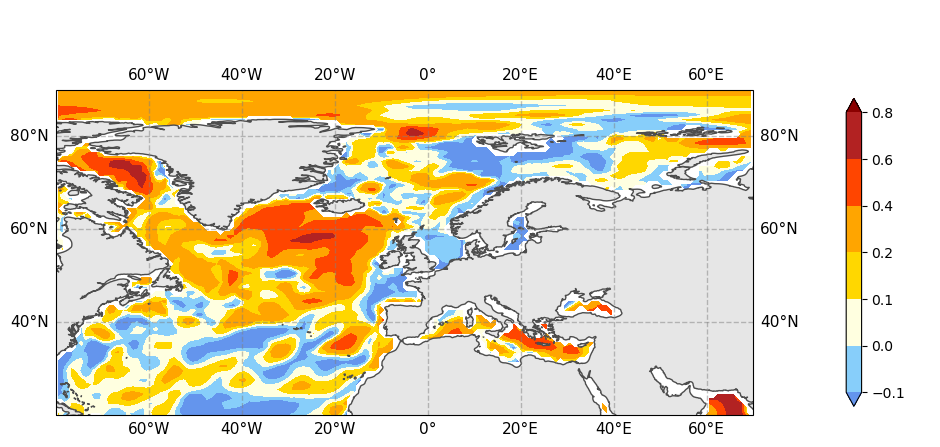

In [15]:
import math
cc = auto[1,:,:]    # lag year 3
fig = plt.figure(figsize=(12,5));
ax = plt.axes(projection=ccrs.PlateCarree())
p = cc.plot.contourf(ax=ax, x='lon', y='lat',levels = [-0.1, 0, 0.1, 0.2, 0.4, 0.6, 0.8], 
                              colors= ['cornflowerblue', 'lightskyblue', 'lightyellow','gold', 'orange',
                                       'orangered','firebrick', 'darkred'],
                              extend = 'both', add_colorbar=False, add_labels=False)


#ax.coastlines()
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'coastline', '50m',
                                              edgecolor='0.3',
                                              facecolor='0.9'))
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlines = True
gl.ylines = True
ax.set_extent([-80,70,20,90])
gl.xlocator = mticker.FixedLocator(np.arange(-80,90,20))
gl.ylocator = mticker.FixedLocator(np.arange(20,90,20)) #([30,60],180)


gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 11, 'color': 'k','rotation':0}
gl.ylabel_style = {'size':11,'rotation':0}
#plt.title('hello', y=1.08)


cbar = plt.colorbar(p, orientation='vertical', shrink=0.8, pad = 0.1)
cbar.set_label(' ', size= 15)
ax.set_title(' ',size = '15', pad = 30)

Text(0.5, 1.0, ' ')

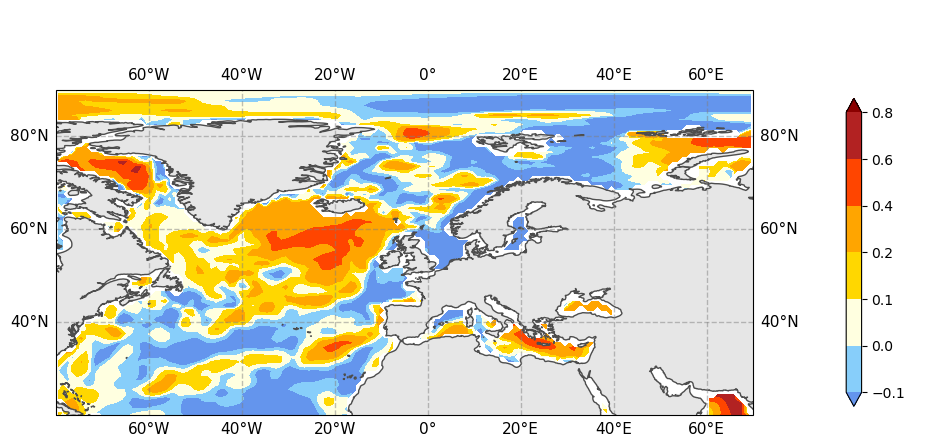

In [16]:
import math
cc = auto[2,:,:]    # lag year 4
fig = plt.figure(figsize=(12,5));
ax = plt.axes(projection=ccrs.PlateCarree())
p = cc.plot.contourf(ax=ax, x='lon', y='lat',levels = [-0.1, 0, 0.1, 0.2, 0.4, 0.6, 0.8], 
                              colors= ['cornflowerblue', 'lightskyblue', 'lightyellow','gold', 'orange',
                                       'orangered','firebrick', 'darkred'],
                              extend = 'both', add_colorbar=False, add_labels=False)


#ax.coastlines()
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'coastline', '50m',
                                              edgecolor='0.3',
                                              facecolor='0.9'))
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlines = True
gl.ylines = True
ax.set_extent([-80,70,20,90])
gl.xlocator = mticker.FixedLocator(np.arange(-80,90,20))
gl.ylocator = mticker.FixedLocator(np.arange(20,90,20)) #([30,60],180)


gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 11, 'color': 'k','rotation':0}
gl.ylabel_style = {'size':11,'rotation':0}
#plt.title('hello', y=1.08)


cbar = plt.colorbar(p, orientation='vertical', shrink=0.8, pad = 0.1)
cbar.set_label(' ', size= 15)
ax.set_title(' ',size = '15', pad = 30)